# Tutorial

## Creating and Extending Erdos-Renyi and Barabasi-Albert Networks
We will begin by importing the necessary packages and scripts

In [1]:
import os
import sys

In [2]:
# Add src/ and dependencies/ folders to environmental path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src')))
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'dependencies')))

In [3]:
from FIDDLE import *

## Next we must set key parameters to describe the network we wish to create

In [4]:
#Specifying key variables for network creation:

#     Attribute of your network
network_type = 5
nodes = 10 
positive_probability = 0.5

# #     Additional but unnecessary attributes for your network
# edge_probability=0.5 #Only affects network_type = 2 or 4
# attaching_edges=2 #Only affects network_type = 5

#     Directory to save the output
# To keep root folder intact, save outputs in directory 'examples/output/' and group by output_base
out_dir = 'output'
output_base = '1_Sample_Network'

isExist = os.path.exists(os.path.join(out_dir, output_base))
if not isExist:
    os.makedirs(os.path.join(out_dir, output_base))

#     Variables to save the network
network_description_file = os.path.join(out_dir, output_base, 'network_description.txt')
network_figure_file = os.path.join(out_dir, output_base, 'network_figure.png')
network_model_file = os.path.join(out_dir, output_base, 'network_full.xlsx')

#Variables to run a simulation
network_trace_file = os.path.join(out_dir, output_base, 'network_trace.txt')

## Creating the network itself

In [5]:
#Create the network
G = graph_maker(network_type, nodes, positive_probability)
# print(type(G))

# See the edges in G
edge_list = get_model_edges(G)
# print(edge_list)

# See the Characteristics of the created network
# return_model_stats(G, network_type, nodes, positive_probability)
return_model_stats(G, network_type, nodes, positive_probability, save = True, filename = network_description_file)

------------------ Specified Network Characteristics ------------------
Network Type: 5
Specified Nodes: 10
Specified Probability of Positive Edges: 0.5
Specified 'edge_probability' (only affects Type 2 and 4): 0.5
Specified 'attaching_edges' (only affects Type 5): 2

-------------------- Actual Network Characteristics -------------------
Number of Actual Nodes: 10
Number of Directed Edges: 16
Number of Positive Edges: 10
Number of Negative Edges: 6
Actual Probability of Positive Edges: 0.625

----------------- Descriptive Network Characteristics -----------------
Network Density: 0.17777777777777778
Undirected Edges: 32
Network Average Degree: 3.2
Undirected Model Diameter: 3
Undirected Model Clustering: 0.32666666666666666

---------------------------- List of Edges ---------------------------
['0', '1', '-']
['0', '2', '-']
['0', '3', '+']
['0', '4', '+']
['0', '8', '+']
['1', '3', '-']
['1', '5', '+']
['1', '7', '+']
['3', '4', '+']
['3', '6', '+']
['3', '9', '-']
['4', '5', '-']
[

## Visualizing the Network

<Figure size 500x500 with 0 Axes>

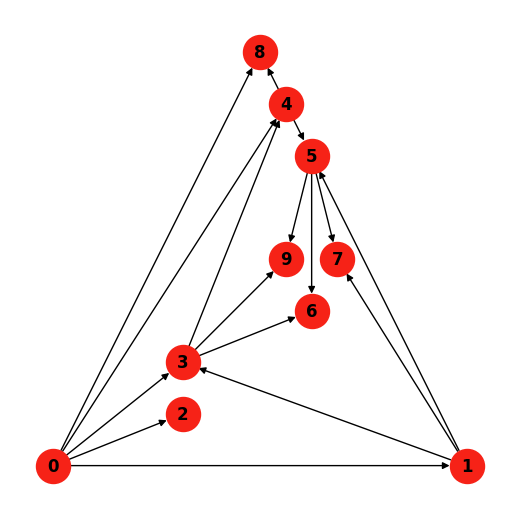

In [6]:
# See the network itself
#Saving the figure
plot_network(G, save = True, filename = network_figure_file)

#Displaying the figure (not saving)
plot_network(G)

## Saving the network to a file

In [7]:
#Saving the network to an excel file
# network_to_excel(G)
network_to_excel(G, filename = network_model_file)

## Initializing the network and getting it ready for simulation

In [8]:
#Create an initialization scheme for the network
initial_vals = create_initial_values(G, initial=1)
# initial_vals = create_initial_values_random(G, lower_bound = 0, upper_bound = 2)
# initial_vals = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
# initial_vals = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '10':10}
# initial_vals = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10':10}
print(initial_vals)

#Add initial values to the network file
update_network_file(filename = network_model_file, update_column = 6, update_values = initial_vals)

{'0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '8': 1, '5': 1, '7': 1, '6': 1, '9': 1}


## Simulating the Network based on the initial values and network structure

In [9]:
#Simulate the network

#Initialization of key parameters:
simulation_runs = 10 #simRun
simulation_length = 100 #simLen

#Simulate the network
simulate_network(network_model_file, simulation_runs, simulation_length, network_trace_file)

## Saving the simulation end values

In [10]:
#Identify the simulation end state and values
end_vals = get_simulation_end_values(network_trace_file, simulation_runs)

#Update the network file to include the end values for each node
update_network_file(filename = network_model_file, update_column = 7, update_values = end_vals)

## Creating extendable models from the base network we just created

In [11]:
# Definingh key Variables
output_base2 = '2_Sample_Removal'
output_directory = os.path.join(out_dir, output_base2)
removal_probabilities = [0.1, 0.25]

#Wrapper function to create extenable models from base G
create_extendable_models(G, output_directory, removal_probabilities, end_vals, model_name = 'network', positive_probability = 0.5)

# #Copy in relevant full network files such that we can see the removal process
# os.system("cp "+network_description_file+" "+output_directory+str(network_description_file.split("/")[-1]))
# os.system("cp "+network_figure_file+" "+output_directory+str(network_figure_file.split("/")[-1]))
# os.system("cp "+network_model_file+" "+output_directory+str(network_model_file.split("/")[-1]))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

## Extending models 

In [12]:
#Getting the directory ready 
# Creating the directory to store this example
extension_base = '3_Extension'
extension_directory = os.path.join(out_dir, extension_base)
os.makedirs(extension_directory, exist_ok=True)

# Copying in the relevant Files
#    Network to be extended
file_to_copy = os.path.join(out_dir, output_base2, 'Missing_25_percent','network_missing_25_percent.xlsx')
new_filename = "network_to_extend.xlsx"
network_file_location = os.path.join(extension_directory, new_filename)
os.system("cp " + file_to_copy + " " + network_file_location)

#    Real Extensions (those that were actually in the initial baseline model)
file_to_copy = os.path.join(out_dir, output_base2, 'Missing_25_percent','network_missing_25_percent_grouped_real_ext')
new_filename = "extensions_real"
extensions_real_location = os.path.join(extension_directory, new_filename)
os.system("cp " + file_to_copy + " " + extensions_real_location)

#    Fake Extensions (those that were never in the initial baseline model)
file_to_copy = os.path.join(out_dir, output_base2, 'Missing_25_percent','network_missing_25_percent_grouped_fake_ext')
new_filename = "extensions_fake"
extensions_fake_location = os.path.join(extension_directory, new_filename)
os.system("cp " + file_to_copy + " " + extensions_fake_location)

0

In [13]:
# In reality, you won't know which extensions are real or fake. Let's combine the files now to mimic real life. 
with open(extensions_real_location,'rb') as extensions: extensions_real = pickle.load(extensions)
with open(extensions_fake_location,'rb') as extensions: extensions_fake = pickle.load(extensions)

#Initialize list for all extensions
total_extensions = []

#Seed the random generator 
random.seed()

#While not perfect, this ensure the extensions are added in a semi-mixed format with real/fake extensions not being lumped in the front or back 
for real, fake in zip(extensions_real, extensions_fake):

    #Pick a random number
    prob = random.random()

    #Add real first
    if prob > 0.5: 
        total_extensions.append(real)
        total_extensions.append(fake)

    #Add fake first
    else: 
        total_extensions.append(fake)
        total_extensions.append(real)

#Saving the total extensions now
with open(os.path.join(extension_directory,'all_extensions'),'wb') as extensions: pickle.dump(total_extensions, extensions)

## Extending the model via BFA

In [14]:
#Set the directory to extend the model in a BFA manner
output_directory = os.path.join(extension_directory, 'BFA')

start_model = os.path.join(extension_directory, 'network_to_extend.xlsx')
extensions_file = os.path.join(extension_directory, 'all_extensions')
with open(extensions_file,'rb') as extensions: possible_extensions = pickle.load(extensions)

#Parameterizing key variables for the extension process
# Many of these variables were set above during the network creation phase. 
# They are being re-set here for clarity and convenience.
# weight = 1                          #Don't worry about this, this is for future work 
# num_Scen = 1                        #Don't worry about this, this is for future work 
simulation_runs = 10
simulation_length = 100

#Unsupported for no
#Set multiprocessing capabilities
# numCores = 1
# numCores = multiprocessing.cpu_count()

In [15]:
BFA(start_model, possible_extensions, simulation_runs, simulation_length, output_directory)

Initial difference between the correct and current model: 9.700000000000001
Extension: [16, ['9', '7', '+']] has a score of: 0.8
Extension: [0, ['0', '1', '-']] has a score of: 8.7
Extension: [1, ['0', '2', '-']] has a score of: 3.0999999999999996
Extension: [17, ['9', '8', '+']] has a score of: 0.4000000000000002
Extension: [2, ['3', '9', '-']] has a score of: 0.7999999999999998
Extension: [18, ['4', '3', '-']] has a score of: 1.3999999999999997
Extension: [19, ['7', '1', '-']] has a score of: 8.1
Extension: [3, ['0', '4', '+']] has a score of: 6.8
Extension: [20, ['7', '8', '-']] has a score of: 3.0999999999999996
Extension: [4, ['3', '6', '+']] has a score of: 1.6
Extension: [5, ['4', '8', '+']] has a score of: 1.0
Extension: [21, ['2', '9', '+']] has a score of: 2.8
Minimum found of: 0.4000000000000002 with extension 17
Minimum was less than previous score, saving best extension.
Extension: [16, ['9', '7', '+']] has a score of: 2.2
Extension: [0, ['0', '1', '-']] has a score of: 8.

## Extending the model via DFA

In [16]:
#Set the directory to extend the model in a BFA manner
output_directory = os.path.join(extension_directory, 'DFA')

start_model = os.path.join(extension_directory, 'network_to_extend.xlsx')
extensions_file = os.path.join(extension_directory, 'all_extensions')
with open(extensions_file,'rb') as extensions: possible_extensions = pickle.load(extensions)

#Parameterizing key variables for the extension process
# Many of these variables were set above during the network creation phase. 
# They are being re-set here for clarity and convenience.
# weight = 1                          #Don't worry about this, this is for future work 
# num_Scen = 1                        #Don't worry about this, this is for future work 
simulation_runs = 10
simulation_length = 100

#Unsupported for no
#Set multiprocessing capabilities
# numCores = 1
# numCores = multiprocessing.cpu_count()

In [17]:
DFA(start_model, possible_extensions, simulation_runs, simulation_length, output_directory)

Initial difference between the correct and current model: 10.399999999999999
Starting extending the current best model with extension: 16
Extension: [16, ['9', '7', '+']] has a score of: 2.3
Extension: [16, ['9', '7', '+']] is an improvement.
Starting extending the current best model with extension: 0
Extension: [0, ['0', '1', '-']] has a score of: 9.7
Starting extending the current best model with extension: 1
Extension: [1, ['0', '2', '-']] has a score of: 5.2
Starting extending the current best model with extension: 17
Extension: [17, ['9', '8', '+']] has a score of: 1.5999999999999999
Extension: [17, ['9', '8', '+']] is an improvement.
Starting extending the current best model with extension: 0
Extension: [0, ['0', '1', '-']] has a score of: 10.0
Starting extending the current best model with extension: 1
Extension: [1, ['0', '2', '-']] has a score of: 3.6999999999999997
Starting extending the current best model with extension: 2
Extension: [2, ['3', '9', '-']] has a score of: 1.40